## Gradient descent

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

h_wo = tf.constant([0.05321,0.05352,0.05253])
e =  tf.constant([0.05224,0.05246,0.05217])
h_w = tf.constant([0.05735,0.05632,0.05751])

m1 = tf.reduce_mean(h_wo)
m2 = tf.reduce_mean(e)
m3 = tf.reduce_mean(h_w)
print(m1)
print(m2)
print(m3)

tf.Tensor(0.05308667, shape=(), dtype=float32)
tf.Tensor(0.052290004, shape=(), dtype=float32)
tf.Tensor(0.05706, shape=(), dtype=float32)


In [2]:
def plot_graph(X,Y,X_hat=None,Y_hat=None,str_title=None):
    fig = plt.figure(figsize=(8,6))

    if str_title is not None :
        plt.title(str_title,fontsize=20, pad=20)

    plt.plot(X,Y, ls='none', marker='o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)

    plt.tick_params(axis='both',labelsize=14)

(40,)
(40,)
tf.Tensor(
[1.8987799 4.5457516 3.383644  2.1203423 1.7753278 2.018879  3.087808
 2.7967396 2.4418437 2.279456  2.3740077 2.284974  2.6516457 2.66353
 3.1825757 4.1085954 4.279659  2.9785242 2.6803112 3.3733256 5.903088
 4.411979  5.4369044 6.8365564 6.21176   5.0107136 4.735779  4.4627514
 4.248066  5.5212245 4.948624  3.7568302 5.164639  4.4573326 6.509138
 6.7362537 4.816311  6.173609  5.079377  4.4586973], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


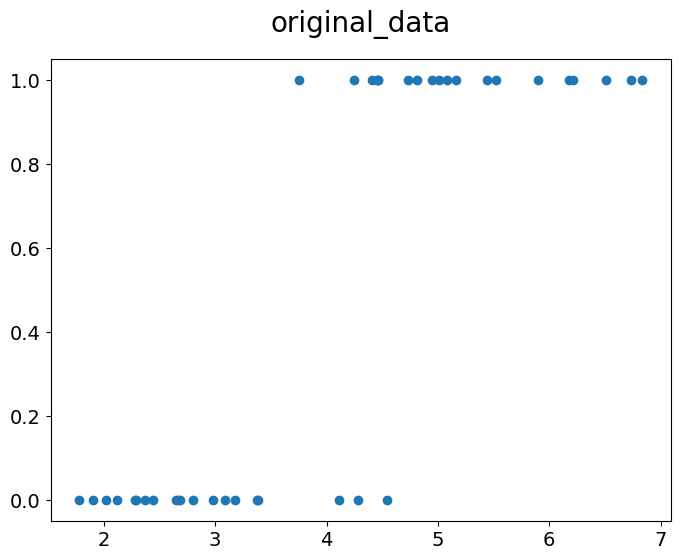

In [3]:
x_0 = tf.random.normal([20], 3, 1) #tf.random.normal([4], 3, 1, tf.float32)
y_0 = tf.zeros(20)
x_1 = tf.random.normal([20], 5.5, 1)
y_1 = tf.ones(20)

x = tf.concat([x_0,x_1],0)
y = tf.concat([y_0, y_1],0)

print(x.shape)
print(y.shape)
print(x)
print(y)
plot_graph(x,y,str_title='original_data')

In [4]:
def cross_entropy(x, y, w, b):
    y_pred = tf.sigmoid(x*w+b)
    return -tf.reduce_sum(y*tf.math.log(y_pred)+(1-y)*(tf.math.log(1-y_pred)))


def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    N=tf.shape(x)[0]
    for i in range(0, N):
        x_i = x[i]
        y_i = y[i]
        y_pred=tf.sigmoid(x_i*w+b)

        dL_df1 = -(y_i-y_pred)/(y_pred*(1-y_pred))
        dL_df2 = dL_df1*(y_pred*(1-y_pred))

        b_gradient += dL_df2
        w_gradient += dL_df2*x_i

    return [w_gradient, b_gradient]



def apply_gradient(gradients, parameters, learning_rate):
    [w_g, b_g] = gradients
    [w, b] = parameters
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    return [w, b]

def run_opt(x, y, w, b, learning_rate):
    gradients = cal_gradient(x, y, w, b)
    return apply_gradient(gradients, [w, b], learning_rate)



In [5]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

learning_rate = 0.005
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new

    if step % display_step == 0:
        loss = cross_entropy(x, y, w, b)
        print("step: ", step, ", loss: ", loss.numpy(), ", w: ", w.numpy(), ", b: ", b.numpy())

step:  0 , loss:  36.695183 , w:  [-0.26500764] , b:  [1.7008123]
step:  200 , loss:  15.902734 , w:  [0.7236111] , b:  [-2.5827227]
step:  400 , loss:  11.78868 , w:  [1.1880534] , b:  [-4.5297217]
step:  600 , loss:  10.208406 , w:  [1.4801341] , b:  [-5.745573]
step:  800 , loss:  9.379108 , w:  [1.6921268] , b:  [-6.6286507]
step:  1000 , loss:  8.869536 , w:  [1.8581486] , b:  [-7.3217077]
step:  1200 , loss:  8.5255575 , w:  [1.994332] , b:  [-7.8915105]
step:  1400 , loss:  8.278458 , w:  [2.109559] , b:  [-8.374664]
step:  1600 , loss:  8.092948 , w:  [2.2092357] , b:  [-8.793422]
step:  1800 , loss:  7.9490147 , w:  [2.296904] , b:  [-9.162363]


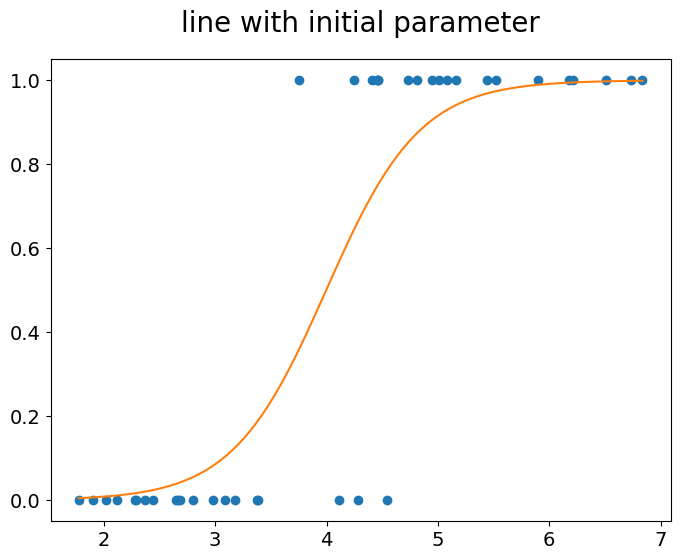

In [6]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, tf.sigmoid(w*x_fl+b), str_title="line with initial parameter")